<a href="https://colab.research.google.com/github/andalmod/Test/blob/main/Nando_bayesian_optimization_r1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.cs.ubc.ca/~nando/540-2013/lectures/gp.py

In [120]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import norm


In [121]:
# This is the true unknown function we are trying to approximate
f = lambda x: (np.sin(0.9*x)*x**2).flatten()

In [122]:
# Define the kernel
def kernel(a, b,param):
    """ GP squared exponential kernel """
    kernelParameter = param
    scale=3
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return scale*np.exp(-.5 * (1/kernelParameter) * sqdist)

In [123]:
#Aquisition function
def aq(obj,mu,sigma):
  gauss=norm(mu,sigma)
  prob=gauss.cdf(obj)
  return 1-prob

In [124]:
#Steps of bayesian optimization

def step(Xtest,X,N,max_ind):

  x_new=Xtest[max_ind]
  X=np.vstack ((X,x_new) )
  N+=1

  y = f(X) + s_1*np.random.randn(N)


  K = kernel(X, X,parameter)
  L = np.linalg.cholesky(K + s_2*np.eye(N))


  # points we're going to make predictions at.
  Xtest = np.linspace(-4, 4, n).reshape(-1,1)

  # compute the mean at our test points.
  Lk = np.linalg.solve(L, kernel(X, Xtest,parameter))
  mu = np.dot(Lk.T, np.linalg.solve(L, y))

  # compute the variance at our test points.
  K_ = kernel(Xtest, Xtest,parameter)
  s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
  s = np.sqrt(s2)

  fmax=max(y)

  u_x=[]
  for i, mu_i in enumerate(mu):
    obj=fmax+eps
    sig_i=s[i]
    u_x.append(aq(obj,mu_i,sig_i))

  u_x_10=np.array(u_x)*10
  # PLOTS:
  pl.figure(1)
  pl.clf()
  pl.plot(X, y, 'r+', ms=20)
  pl.plot(Xtest, f(Xtest), 'b-')
  pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
  pl.plot(Xtest, mu, 'r--', lw=2)
  pl.savefig('predictive.png', bbox_inches='tight')
  pl.title('Mean predictions plus 3 st.deviations')
  #pl.axis([-5, 5, -3, 3])
  pl.plot(Xtest, u_x_10, 'g', lw=2)
  max_ind=np.argmax(u_x_10)
  pl.axvline(x=Xtest[max_ind]);



In [125]:
#Cross validation to obtain the best parameter of the kernel

def gp_cross(param):

  parameter=param

  N = 10         # number of training points.
  n = 50         # number of test points.
  s_1=0.001     # function noise
  s_2=0.001      #noise considered for the covariance matrix

  # Sample some input points and noisy versions of the function evaluated at
  # these points. 
  X = np.random.uniform(-5, 5, size=(N,1))
  y = f(X) + s_1*np.random.randn(N)


  K = kernel(X, X,parameter)
  L = np.linalg.cholesky(K + s_2*np.eye(N))


  #test set

  X_test2 = np.random.uniform(-5, 5, size=(N,1))
  y_test2 = f(X_test2) + s_1*np.random.randn(N)


  # compute the mean at our test points.
  Lk = np.linalg.solve(L, kernel(X, X_test2,parameter))
  mu = np.dot(Lk.T, np.linalg.solve(L, y))

  err=abs(y_test2-mu).sum()

  return err


In [126]:
parameters=np.linspace(0.001,100,1000)

In [127]:
error=[]
for p in parameters:
  error.append(gp_cross(p))

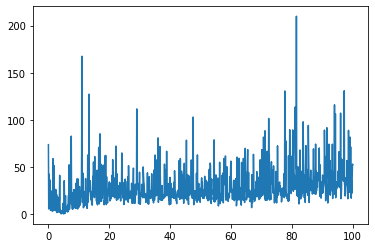

In [128]:
pl.plot(parameters,error);

In [129]:
ind=error.index(min(error))

In [130]:
p_opt=parameters[ind]
parameter=p_opt


# Bayesian optimization

In [131]:
eps=0.1

In [132]:
# We start with N points

In [133]:
  N = 1         # number of training points.
  n = 50         # number of test points.
  s_1=0.001     # function noise
  s_2=0.001      #noise considered for the covariance matrix

  # Sample some input points and noisy versions of the function evaluated at
  # these points. 
  X = np.random.uniform(-4, 4, size=(N,1))
  y = f(X) + s_1*np.random.randn(N)


  K = kernel(X, X,parameter)
  L = np.linalg.cholesky(K + s_2*np.eye(N))


  # points we're going to make predictions at.
  Xtest = np.linspace(-4, 4, n).reshape(-1,1)

  # compute the mean at our test points.
  Lk = np.linalg.solve(L, kernel(X, Xtest,parameter))
  mu = np.dot(Lk.T, np.linalg.solve(L, y))

  # compute the variance at our test points.
  K_ = kernel(Xtest, Xtest,parameter)
  s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
  s = np.sqrt(s2)

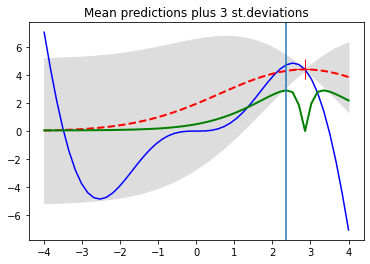

In [134]:
fmax=max(y)

u_x=[]
for i, mu_i in enumerate(mu):
  obj=fmax+eps
  sig_i=s[i]
  u_x.append(aq(obj,mu_i,sig_i))

u_x_10=np.array(u_x)*10
# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(Xtest, f(Xtest), 'b-')
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations')
#pl.axis([-5, 5, -3, 3])
pl.plot(Xtest, u_x_10, 'g', lw=2)
max_ind=np.argmax(u_x_10)
pl.axvline(x=Xtest[max_ind]);


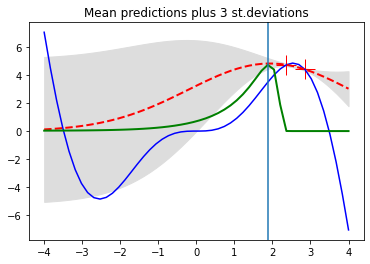

In [135]:
step(Xtest,X,N,max_ind)


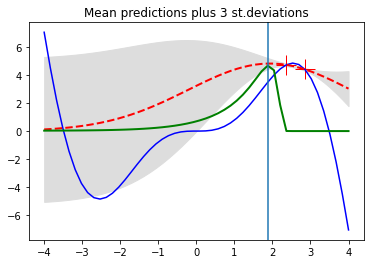

In [136]:
step(Xtest,X,N,max_ind)

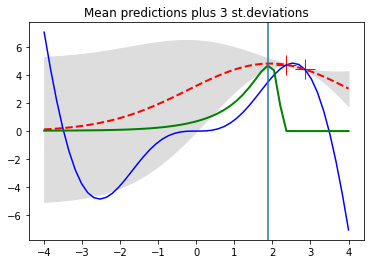

In [137]:
step(Xtest,X,N,max_ind)